# <center>Final Project 3</center>

Group 3 :
- Jasmine Nur Ramadhani (PYTN-KS20-016)
- Faizal Azmi Nurwardani (PYTN-KS20-020)
- Afifah Yulfahazani (PYTN-KS20-07)

# Pendahuluan

Penyakit kardiovaskular (CVD) merupakan penyebab kematian utama secara global, yang menyebabkan diperkirakan 17,9 juta kematian setiap tahun, atau sekitar 31% dari seluruh kematian di seluruh dunia. Gagal jantung adalah kejadian umum yang disebabkan oleh CVD, dan dataset ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung. Sebagian besar dari penyakit tersebut dikarenakan faktor lain antaranya merokok, diabetes, anemia, dan faktor-faktor lainnya. Penting untuk mengetahui sedari awal potensi terjadinya penyakit tersebut agar dapat menekan angka kematian akibat penyakit kardiovaskular. Berikut penjelasan mengenai isi dari datasets yang digunakan untuk memprediksi :
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up



# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import imblearn as imbl
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import plotly.express as px
from random import randint
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, balanced_accuracy_score, classification_report,ConfusionMatrixDisplay, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# Mencari nilai null dalam dataset
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Explorasi Data

In [5]:
df.duplicated().sum() #melihat data yang terduplikasi

0

In [6]:
df.describe().reset_index()

,index,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
1,mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
2,std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
3,min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
4,25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
5,50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
6,75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
7,max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
df_e = df.copy()

In [8]:
df_e['DEATH_EVENT'].replace({0:'Bertahan hidup', 1: 'Tidak Bertahan hidup'}, inplace=True)
df_e['sex'].replace({0:'Wanita', 1:'Pria'}, inplace=True)
df_e['smoking'].replace({0:'Tidak Merokok', 1:'Merokok'}, inplace=True)
df_e['diabetes'].replace({0:'Tidak Memiliki Diabetes', 1:'Terkena Diabetes'}, inplace=True)
df_e['anaemia'].replace({0:'Tidak Memiliki Anemia', 1:'Terkena Anemia'}, inplace=True)
df_e['high_blood_pressure'].replace({0:'Tidak memiliki Hipertensi', 1:'Terkena Hipertensi'}, inplace=True)

In [9]:
df_e['DEATH_EVENT'].value_counts()

DEATH_EVENT
Bertahan hidup          203
Tidak Bertahan hidup     96
Name: count, dtype: int64

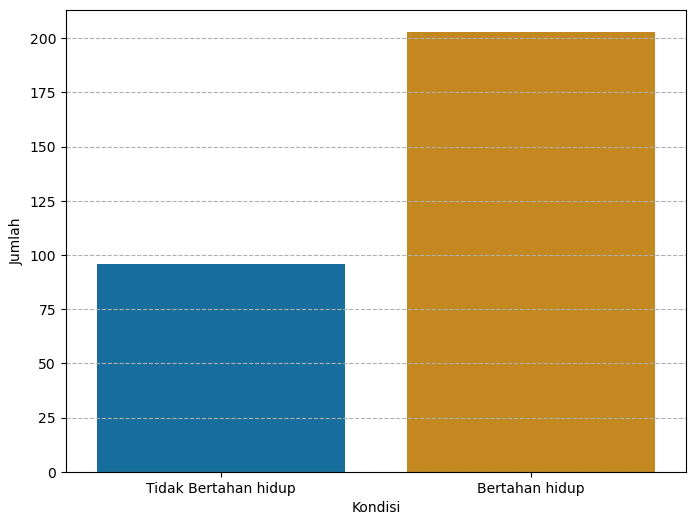

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x="DEATH_EVENT", data=df_e, palette='colorblind')  # Menggunakan palet 'pastel' dari Seaborn
plt.ylabel('Jumlah')
plt.xlabel('Kondisi')
plt.grid(axis='y', linestyle='--')
plt.show()

In [11]:
df_e['smoking'].value_counts()

smoking
Tidak Merokok    203
Merokok           96
Name: count, dtype: int64

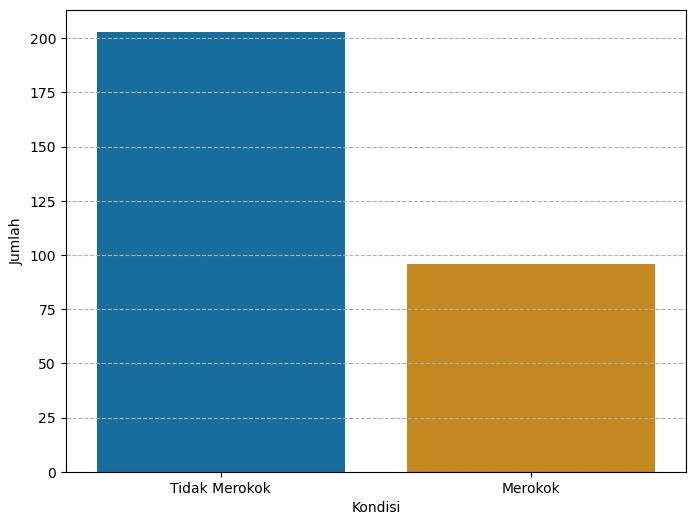

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x="smoking", data=df_e, palette='colorblind')  # Menggunakan palet 'pastel' dari Seaborn
plt.ylabel('Jumlah')
plt.xlabel('Kondisi')
plt.grid(axis='y', linestyle='--')
plt.show()

In [13]:
df_e['sex'].value_counts()

sex
Pria      194
Wanita    105
Name: count, dtype: int64

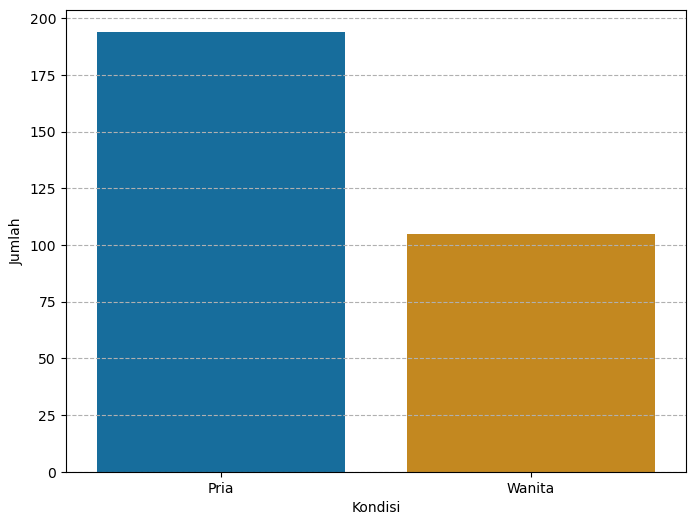

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x="sex", data=df_e, palette='colorblind')  # Menggunakan palet 'pastel' dari Seaborn
plt.ylabel('Jumlah')
plt.xlabel('Kondisi')
plt.grid(axis='y', linestyle='--')
plt.show()

In [15]:
df_e['anaemia'].value_counts()

anaemia
Tidak Memiliki Anemia    170
Terkena Anemia           129
Name: count, dtype: int64

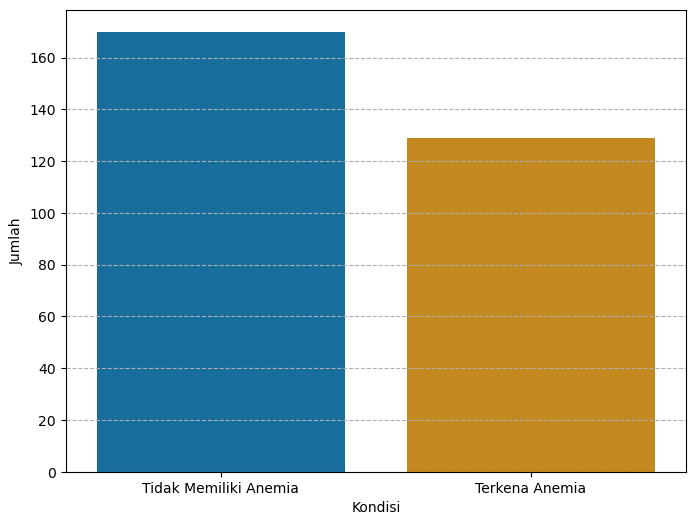

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x="anaemia", data=df_e, palette='colorblind')  # Menggunakan palet 'pastel' dari Seaborn
plt.ylabel('Jumlah')
plt.xlabel('Kondisi')
plt.grid(axis='y', linestyle='--')
plt.show()

In [17]:
df_e['diabetes'].value_counts()

diabetes
Tidak Memiliki Diabetes    174
Terkena Diabetes           125
Name: count, dtype: int64

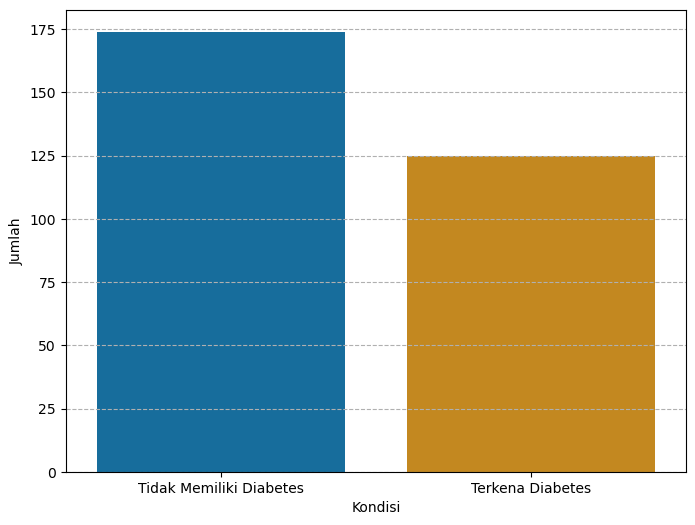

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x="diabetes", data=df_e, palette='colorblind')  # Menggunakan palet 'pastel' dari Seaborn
plt.ylabel('Jumlah')
plt.xlabel('Kondisi')
plt.grid(axis='y', linestyle='--')
plt.show()

In [19]:
df_e['high_blood_pressure'].value_counts()

high_blood_pressure
Tidak memiliki Hipertensi    194
Terkena Hipertensi           105
Name: count, dtype: int64

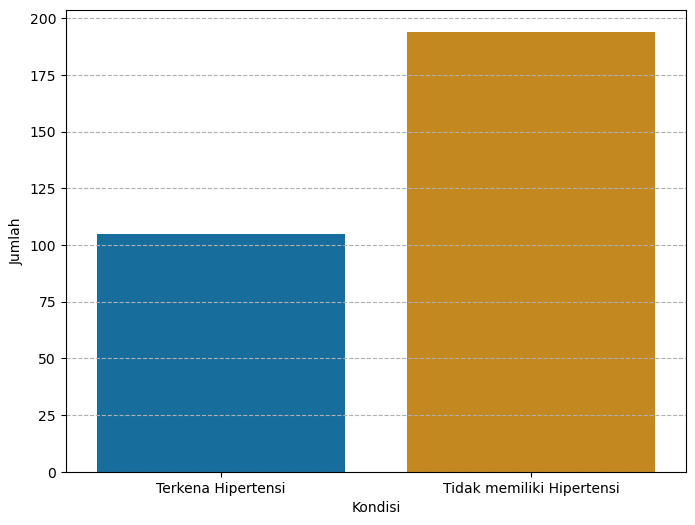

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x="high_blood_pressure", data=df_e, palette='colorblind')  # Menggunakan palet 'pastel' dari Seaborn
plt.ylabel('Jumlah')
plt.xlabel('Kondisi')
plt.grid(axis='y', linestyle='--')
plt.show()

# PreprocessingData

In [21]:
numeric = df.select_dtypes(include='number')

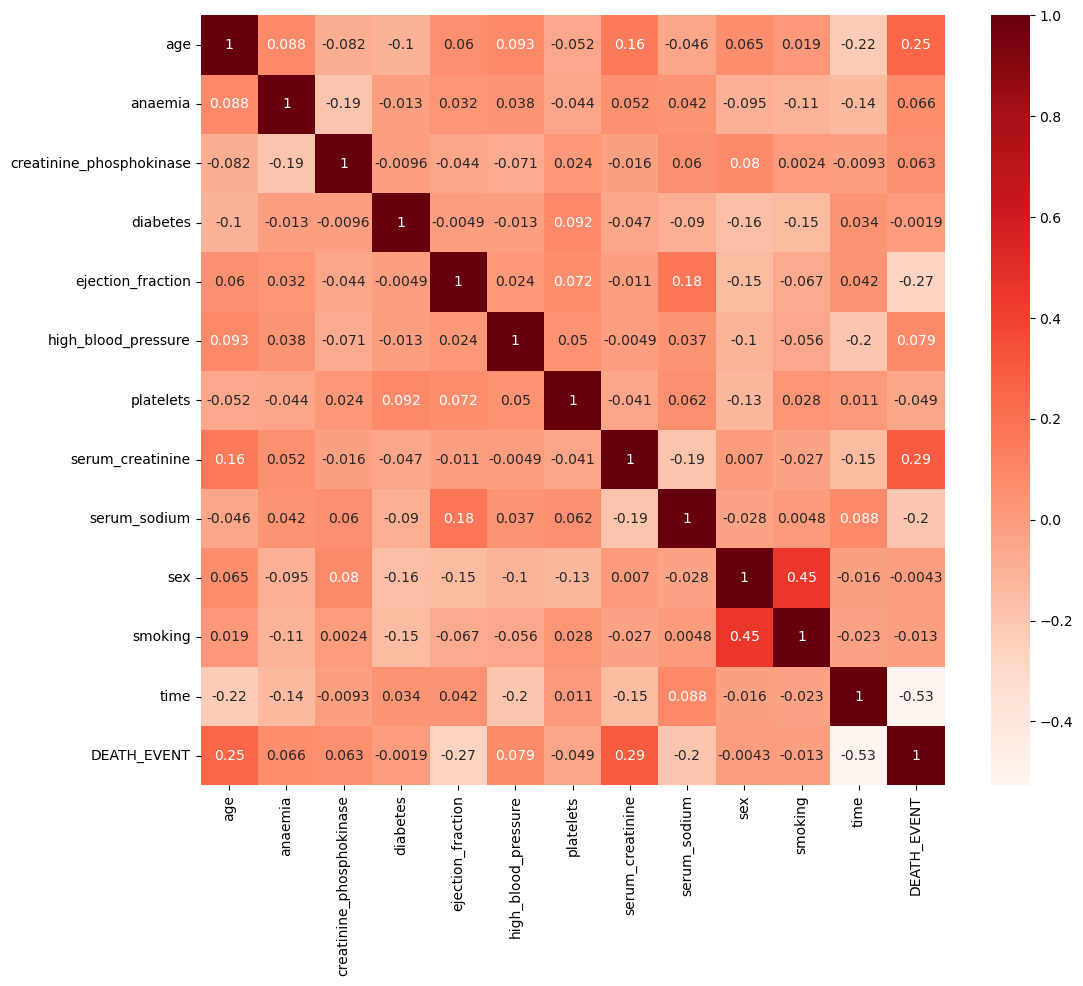

In [22]:
#melihat korelasi antar kolom
correlation = plt.figure(figsize=(12, 10))
sns.heatmap(numeric.corr(), cmap='Reds', annot=True)
plt.show() 

## Skewness

In [23]:
df2 = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 
           'platelets', 'serum_creatinine', 'serum_sodium', 'time']]

In [24]:
# Menghitung skewness untuk setiap variabel
skewness_values = {var: df[var].skew() for var in df2}

# Melakukan sorting nilai skewness dari tertinggi ke terendah
sorted_skewness = sorted(skewness_values.items(), key=lambda x: x[1], reverse=True)

# Menampilkan nilai skewness yang sudah diurutkan
for var, skewness in sorted_skewness:
    print(f'{var} - Skewness: {skewness:.2f}')


creatinine_phosphokinase - Skewness: 4.46
serum_creatinine - Skewness: 4.46
platelets - Skewness: 1.46
ejection_fraction - Skewness: 0.56
age - Skewness: 0.42
time - Skewness: 0.13
serum_sodium - Skewness: -1.05


Skewness adalah ukuran statistik yang digunakan untuk mengukur seberapa simetris atau tidak simetris distribusi data terhadap nilai rata-ratanya.
Jika skewness bernilai:
- Nilai sama dengan 0: Distribusi simetris.
- Lebih dari 0: Distribusi ekor (tail) distribusi lebih panjang ke kanan. Distribusi cenderung memiliki ekor yang lebih panjang di sisi kanan daripada di sisi kiri.
- Kurang dari 0: Distribusi ekor (tail) distribusi lebih panjang ke kiri. Distribusi cenderung memiliki ekor yang lebih panjang di sisi kiri daripada di sisi kanan.
Munculnya nilai skewness menunjukkan adanya outliers dari sebaran data tersebut.

## Outliers

In [25]:
def hitung_outlier(column):
    Q1, Q3 = df[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

for column in df.columns.difference(['DEATH_EVENT']):
    jumlah_outlier = hitung_outlier(column)
    print(f'{column}, jumlah outliernya adalah {jumlah_outlier}')


age, jumlah outliernya adalah 0
anaemia, jumlah outliernya adalah 0
creatinine_phosphokinase, jumlah outliernya adalah 29
diabetes, jumlah outliernya adalah 0
ejection_fraction, jumlah outliernya adalah 2
high_blood_pressure, jumlah outliernya adalah 0
platelets, jumlah outliernya adalah 21
serum_creatinine, jumlah outliernya adalah 29
serum_sodium, jumlah outliernya adalah 4
sex, jumlah outliernya adalah 0
smoking, jumlah outliernya adalah 0
time, jumlah outliernya adalah 0


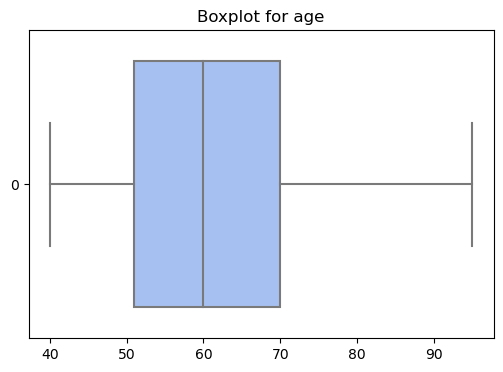

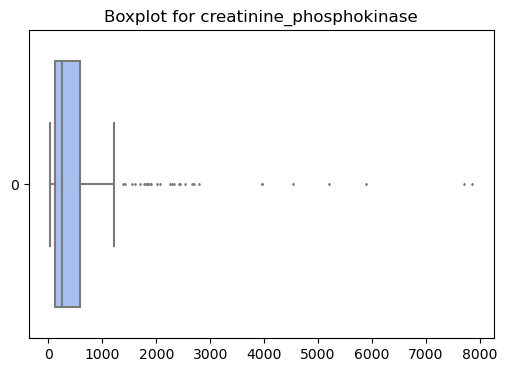

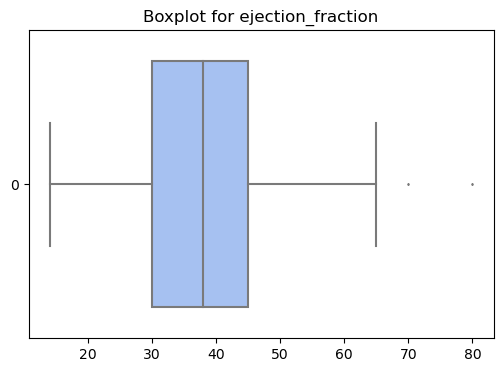

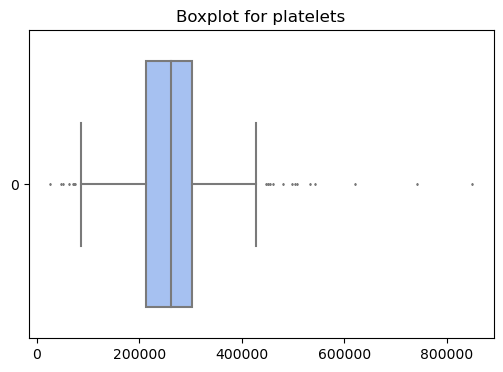

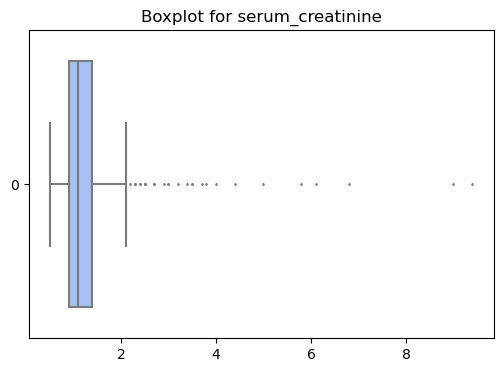

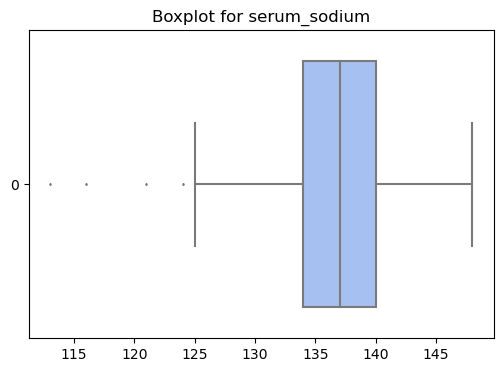

In [26]:
num_col = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium"]

for i in num_col:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[i], color='#99befd', fliersize=1,orient='h')
    plt.title(f'Boxplot for {i}')
    plt.show()

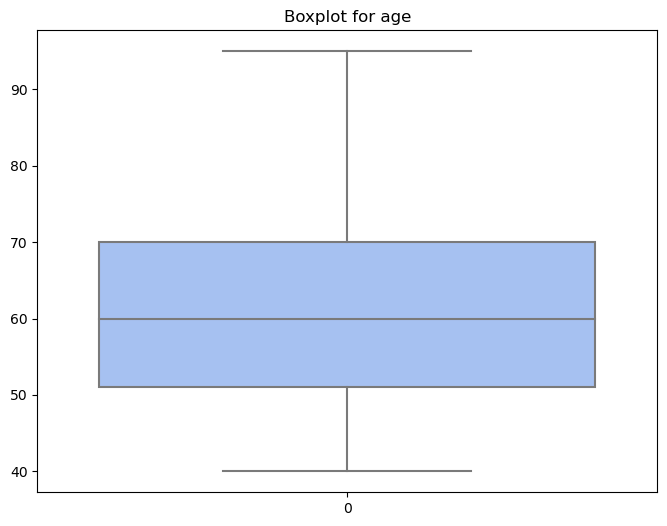

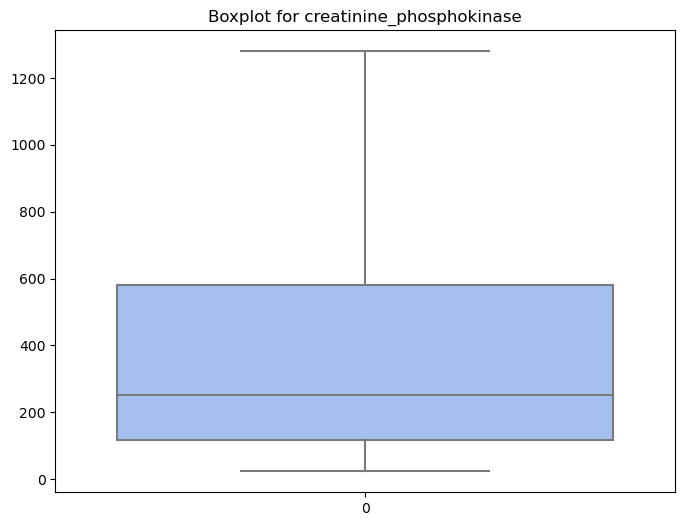

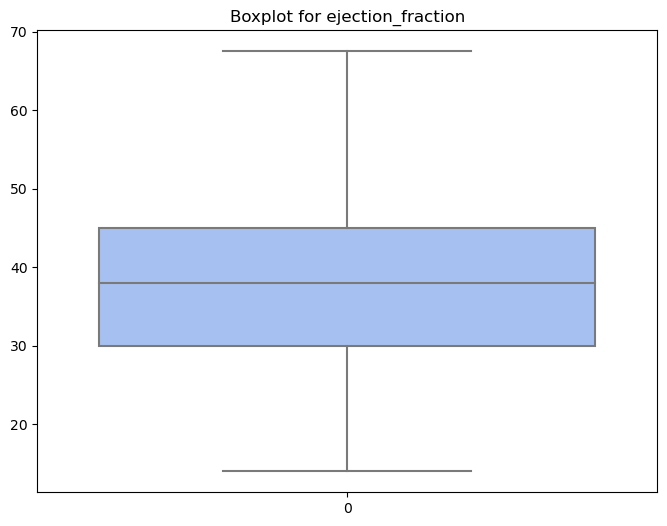

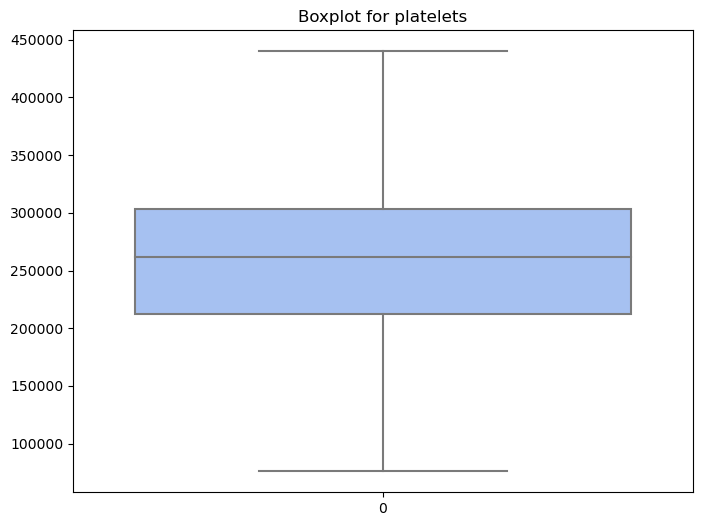

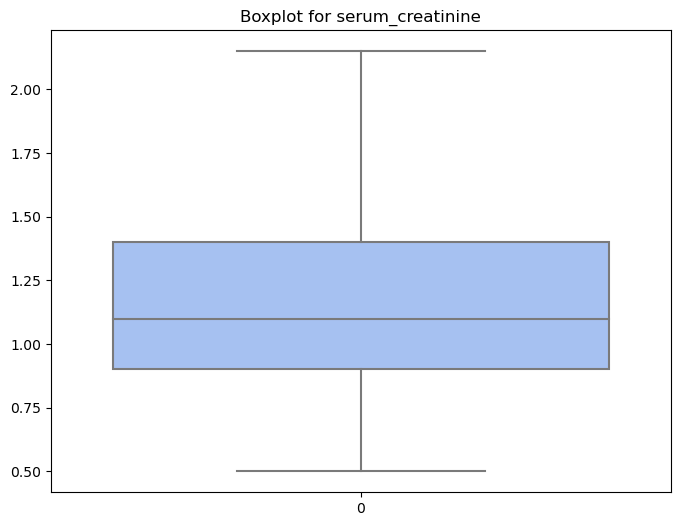

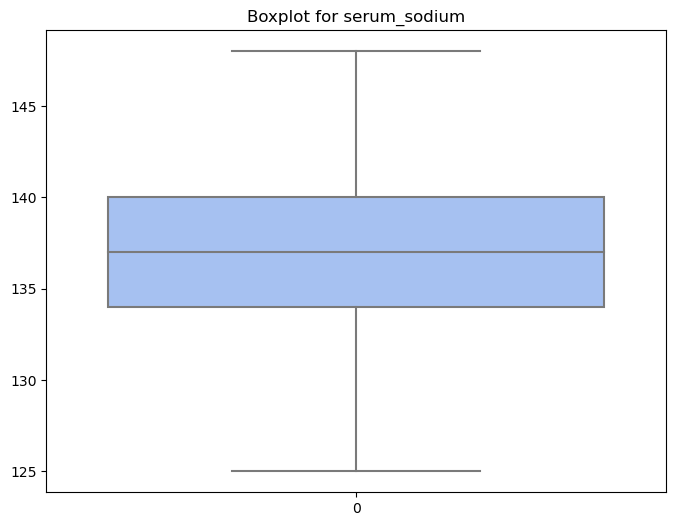

In [27]:
# Identifikasi kolom yang memiliki outliers
clear_outliers = ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']

# Menangani outliers dengan metode IQR (Interquartile Range)
for feature in clear_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - (IQR * 1.5)
    upper_limit = q3 + (IQR * 1.5)
    df.loc[df[feature] < lower_limit, feature] = lower_limit
    df.loc[df[feature] > upper_limit, feature] = upper_limit

# Menampilkan boxplot setelah proses penghapusan
num_col = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium"]

for i in num_col:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[i], color='#99befd', fliersize=1)
    plt.title(f'Boxplot for {i}')
    plt.show()  


# Definisi Model

In [28]:
Features = ['age','anaemia','creatinine_phosphokinase','diabetes','high_blood_pressure','platelets','serum_sodium','sex','smoking','ejection_fraction','serum_creatinine', 'time']
X = df[Features]

In [29]:
y = df["DEATH_EVENT"].values
y = y.ravel()

In [30]:
#X, y train test split
X_train , x_test ,y_train ,y_test =train_test_split(X,y ,test_size=0.30 ,random_state= 0)
print("{0:0.2f}% nilai training set". format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% nilai test set". format((len(x_test)/len(df.index)) * 100))

69.90% nilai training set
30.10% nilai test set


## Random Forest

In [31]:
param_dist_RF = {"n_estimators": [ 100,500, 1000],
              "max_features": ["sqrt", "log2", None],
              "min_samples_split": [1,2,3,4,5],
              "min_samples_leaf": [1,2,3,4,5],
              "max_leaf_nodes": [1, 10, None],
              "min_impurity_decrease": [0.0, 1.0],
              "class_weight": ["balanced", "balanced_subsample", None],
              "criterion": ["gini", "entropy", "logloss"]}

rfc = RandomForestClassifier()
rfc_cv = RandomizedSearchCV(rfc, param_dist_RF, cv=50)

In [32]:
rfc_cv.fit(X_train, y_train)
rfc_pred = rfc_cv.fit(X_train, y_train).predict(x_test)

rfc_accuracy = accuracy_score(y_test, rfc_pred)
rfc_f1 = f1_score(y_test, rfc_pred)
rfc_precision = precision_score(y_test, rfc_pred)
rfc_recall = recall_score(y_test, rfc_pred)
rfc_balanced_accuracy = balanced_accuracy_score(y_test, rfc_pred)

print("accuracy: ",rfc_accuracy)
print("f1 score:", rfc_f1)
print("precision: ", rfc_precision)
print("recall: ", rfc_recall)
print("balanced accuracy: ",rfc_balanced_accuracy)

accuracy:  0.8888888888888888
f1 score: 0.8
precision:  0.9090909090909091
recall:  0.7142857142857143
balanced accuracy:  0.8410138248847927


              precision    recall  f1-score   support

           0       0.86      0.97      0.91        62
           1       0.90      0.64      0.75        28

    accuracy                           0.87        90
   macro avg       0.88      0.81      0.83        90
weighted avg       0.87      0.87      0.86        90



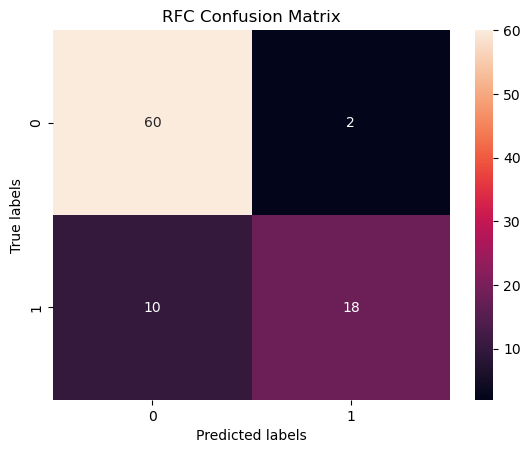

In [33]:
rfc_y_pred = rfc_cv.fit(X_train, y_train).predict(x_test)
rfc_cm = confusion_matrix(y_test,rfc_y_pred)

ax= plt.subplot()
sns.heatmap(rfc_cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('RFC Confusion Matrix');
ax.xaxis.set_ticklabels(['0','1']); ax.yaxis.set_ticklabels(['0','1']);
print(classification_report(y_test, rfc_y_pred))

In [34]:
rfc_rmse = np.sqrt(mean_squared_error(y_test, rfc_y_pred))
print("Root Mean Squared Error (RMSE):", rfc_rmse)

Root Mean Squared Error (RMSE): 0.3651483716701107


## Decision Tree

In [35]:
param_dist_DT = {"criterion": ['gini', 'entropy', 'log_loss'],
              "splitter": ['best', 'random'],
              "max_features": ['sqrt', 'log2', 'auto']}

dt = DecisionTreeClassifier()
dt_cv = RandomizedSearchCV(dt, param_dist_DT, cv=50)

In [36]:
dt_cv.fit(X_train, y_train)
dt_pred = dt_cv.fit(X_train, y_train).predict(x_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_balanced_accuracy = balanced_accuracy_score(y_test, dt_pred)

print("accuracy: ",dt_accuracy)
print("f1 score:", dt_f1)
print("precision: ", dt_precision)
print("recall: ", dt_recall)
print("balanced accuracy: ",dt_balanced_accuracy)

accuracy:  0.8222222222222222
f1 score: 0.7037037037037038
precision:  0.7307692307692307
recall:  0.6785714285714286
balanced accuracy:  0.7828341013824884


              precision    recall  f1-score   support

           0       0.86      0.97      0.91        62
           1       0.90      0.64      0.75        28

    accuracy                           0.87        90
   macro avg       0.88      0.81      0.83        90
weighted avg       0.87      0.87      0.86        90



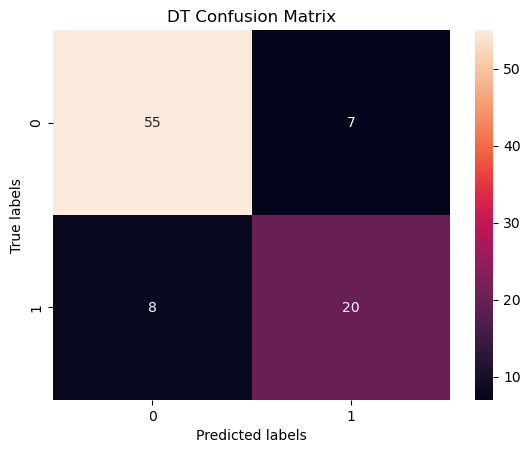

In [37]:
dt_y_pred = dt_cv.fit(X_train, y_train).predict(x_test)
dt_cm = confusion_matrix(y_test,dt_y_pred)

ax= plt.subplot()
sns.heatmap(dt_cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('DT Confusion Matrix');
ax.xaxis.set_ticklabels(['0','1']); ax.yaxis.set_ticklabels(['0','1']);
print(classification_report(y_test, rfc_y_pred))

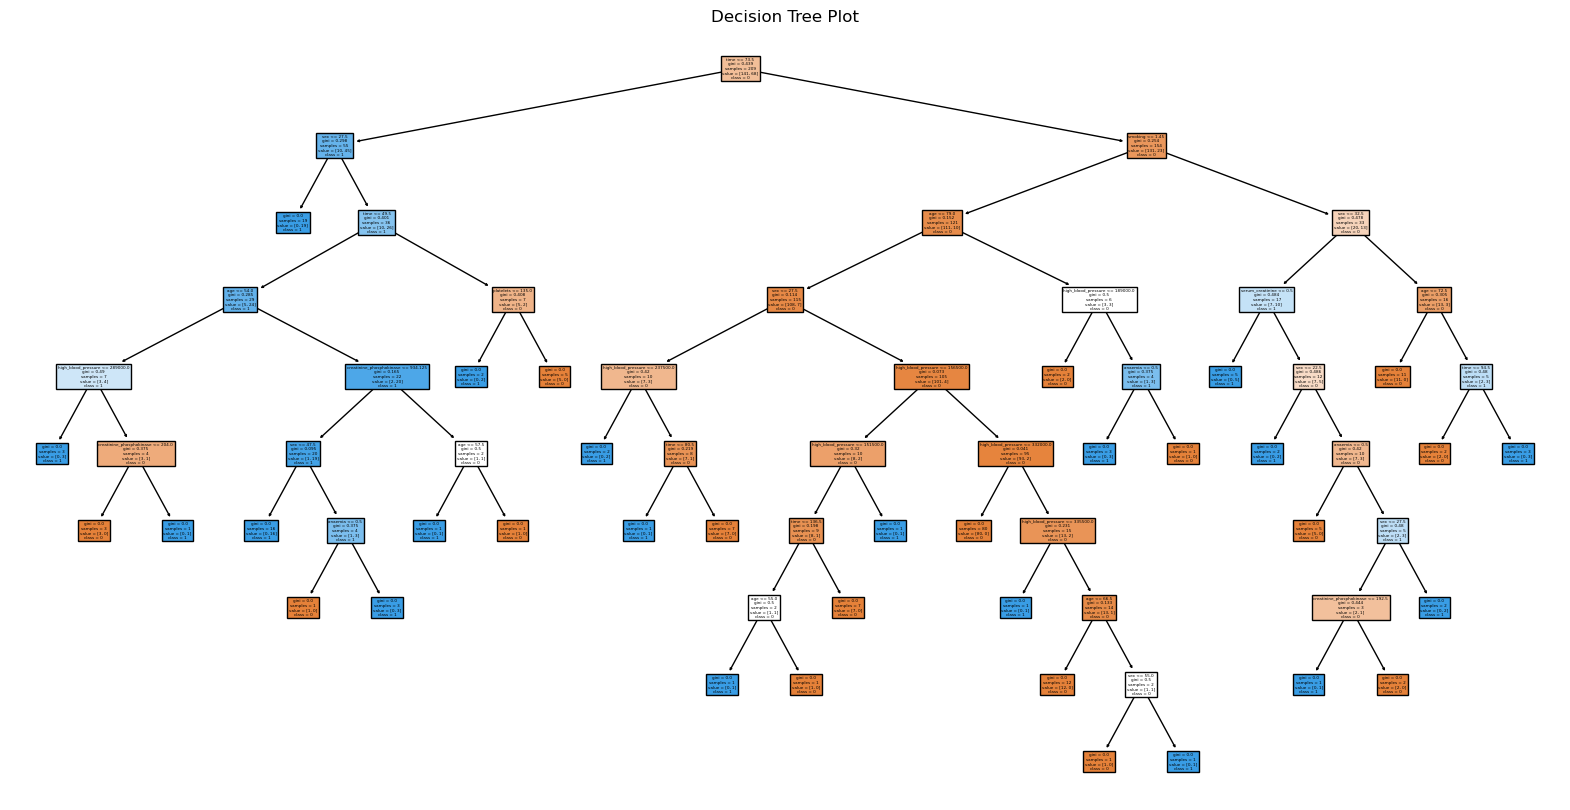

In [38]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=features, class_names=['0', '1'])
plt.title("Decision Tree Plot")
plt.show()


In [39]:
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_y_pred))
print("Root Mean Squared Error (RMSE):", dt_rmse)

Root Mean Squared Error (RMSE): 0.408248290463863


## AdaBoostClassifier

In [40]:
X_train , x_test ,y_train ,y_test =train_test_split(X,y ,test_size=0.30 ,random_state= 0)
print("{0:0.2f}% nilai training set". format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% nilai test set". format((len(x_test)/len(df.index)) * 100))

69.90% nilai training set
30.10% nilai test set


In [41]:
param_dist_AdaBoost = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

ada = AdaBoostClassifier()
ada_cv = RandomizedSearchCV(ada, param_dist_AdaBoost, cv=50)


In [42]:
ada_cv.fit(X_train, y_train)
ada_pred = ada_cv.fit(X_train, y_train).predict(x_test)

ada_accuracy = accuracy_score(y_test, ada_pred)
ada_f1 = f1_score(y_test, ada_pred)
ada_precision = precision_score(y_test, ada_pred)
ada_recall = recall_score(y_test, ada_pred)
ada_balanced_accuracy = balanced_accuracy_score(y_test, ada_pred)

print("accuracy: ", ada_accuracy)
print("f1 score:", ada_f1)
print("precision: ", ada_precision)
print("recall: ", ada_recall)
print("balanced accuracy: ", ada_balanced_accuracy)


accuracy:  0.8777777777777778
f1 score: 0.7755102040816326
precision:  0.9047619047619048
recall:  0.6785714285714286
balanced accuracy:  0.8231566820276498


              precision    recall  f1-score   support

           0       0.87      0.97      0.92        62
           1       0.90      0.68      0.78        28

    accuracy                           0.88        90
   macro avg       0.89      0.82      0.85        90
weighted avg       0.88      0.88      0.87        90



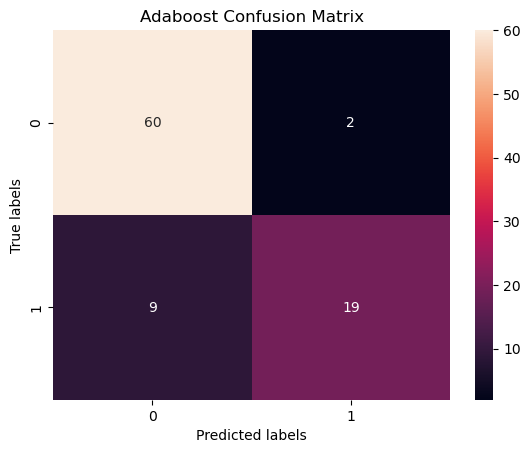

In [43]:
ada_y_pred = ada_cv.fit(X_train, y_train).predict(x_test)
ada_cm = confusion_matrix(y_test, ada_y_pred)

ax = plt.subplot()
sns.heatmap(ada_cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Adaboost Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
print(classification_report(y_test, ada_y_pred))


In [44]:
ada_rmse = np.sqrt(mean_squared_error(y_test, ada_y_pred))
print("Root Mean Squared Error (RMSE):", ada_rmse)

Root Mean Squared Error (RMSE): 0.3496029493900505


## Stacking Model 
Stacking model adalah bagian dari teknik ensemble learning dalam machine learning. Pendekatan ini melibatkan penggabungan atau pengelompokan beberapa model machine learning yang berbeda untuk meningkatkan performa prediksi. Penggunaan penggabungan model dikarenakan adanya keunggulan dari setiap model yang diuji pada pengujian sebelumnya. Dengan harapan pengujian dengan cara ensemble ini menghasilkan akurasi yang lebih baik daripada hanya menggunakan sebuah model saja.

In [45]:
# Buat dataset contoh
X, y = make_classification(n_samples=1000, random_state=0)

# Pisahkan data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# Buat model-model yang ingin digunakan
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
dt = DecisionTreeClassifier(random_state=0)
ada = AdaBoostClassifier(n_estimators=100, random_state=0)

# Buat StackingClassifier dengan model-model tersebut
models = [
    ('Random Forest', rfc),
    ('Decision Tree', dt),
    ('AdaBoost', ada)
]

stacking_classifier = StackingClassifier(estimators=models, final_estimator=LogisticRegression())

# Latih model
stacking_classifier.fit(X_train, y_train)

# Lakukan prediksi
pred = stacking_classifier.predict(X_test)
stc_accuracy = accuracy_score(y_test, pred)
stc_f1 = f1_score(y_test, pred)
stc_precision = precision_score(y_test, pred)
stc_recall = recall_score(y_test, pred)
stc_balanced_accuracy = balanced_accuracy_score(y_test, pred)

print("accuracy: ",stc_accuracy)
print("f1 score:", stc_f1)
print("precision: ", stc_precision)
print("recall: ", stc_recall)
print("balanced accuracy: ",stc_balanced_accuracy)



accuracy:  0.948
f1 score: 0.9482071713147411
precision:  0.937007874015748
recall:  0.9596774193548387
balanced accuracy:  0.9480926779313876


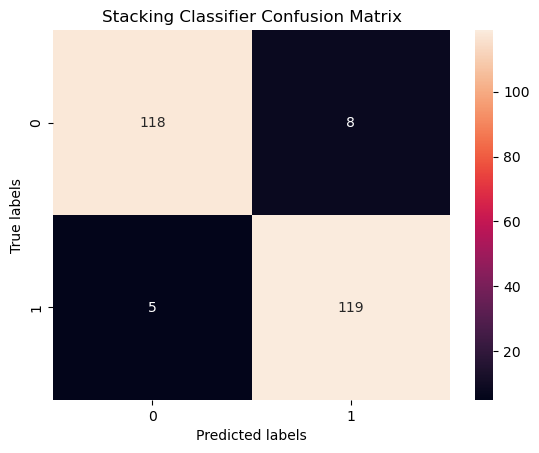

In [46]:
y_pred = stacking_classifier.fit(X_train, y_train).predict(X_test)
stc_cm = confusion_matrix(y_test, y_pred)

ax = plt.subplot()
sns.heatmap(stc_cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Stacking Classifier Confusion Matrix')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

In [47]:
stc_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", stc_rmse)

Root Mean Squared Error (RMSE): 0.22803508501982758


In [50]:
results = {
    'Model': ['Decision Tree Classifier', 'Random Forest','AdaBoostClassifier','Stacking Model'],
    'Balanced Accuracy': [ dt_balanced_accuracy,  rfc_balanced_accuracy, ada_balanced_accuracy, stc_balanced_accuracy ]
}
# Membuat DataFrame dari dictionary
df_results = pd.DataFrame(results)
print(df_results)

                      Model  Balanced Accuracy
0  Decision Tree Classifier           0.782834
1             Random Forest           0.841014
2        AdaBoostClassifier           0.823157
3            Stacking Model           0.948093


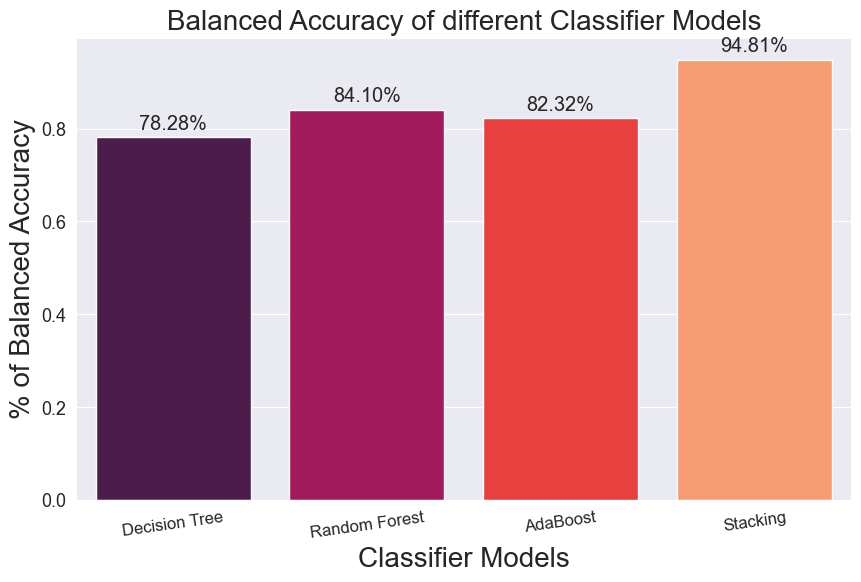

In [66]:
# Data
models = ['Decision Tree', 'Random Forest', 'AdaBoost', 'Stacking']
balanced_accuracy = [dt_balanced_accuracy, rfc_balanced_accuracy, ada_balanced_accuracy, stc_balanced_accuracy]

# Membuat barplot
plt.rcParams['figure.figsize']=10,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=models, y=balanced_accuracy, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Balanced Accuracy", fontsize = 20)
plt.title("Balanced Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

Berdasarkan hasil stacking model didapatkan hasil yang signifikan daripada hanya menggunakan 1 model saja. Perbedaan nilai tertinggi pada uji 1 model dengan stacking model berbeda kisaran 10% sedangkan nilai terendah uji 1 model dibandingkan dengan stacking model beda sekitar 16%. Hasil tersebut menunjukkan akurasi dapat ditingkatkan dengan cara menggabungkan beberapa model untuk melakukan pengujian.

# Kesimpulan

Berdasarkan hasil pengujian menggunakan beberapa model dapat disimpulkan bahwa :
1. Data berisi 13 kolom data dengan pembagian 12 kolom diantaranya saling berkaitan (feature) mempengaruhi 1 kolom target yaitu DEATH_EVENT.
2. Data yang digunakan tidak terlalu besar tetapi miliki nilai outlier sehingga perlu dilakukan penyesuaian terlebih dahulu untuk memastikan data bisa digunakan dengan baik saat training.
3. Pengujian menggunakan 1 model dengan menggunakan Random Forest, Decision Tree, AdaBoostClassifier, menghasilkan nilai balanced akurasi yang cenderung berbeda-beda tetapi setiap model pasti memiliki keunggulan dari salah satu penilaian diantara f1 score,precision,recall. 
4. Penggunaan Stacking model merupakan solusi yang dapat digunakan untuk mengatasi hal tersebut dikarenakan hasil akurasi dari uji data menggunakan stacking model hasilnya cukup berubah signifikan dibandingkan hanya menggunakan 1 model saja.